Data Collection

In [18]:
import pandas as pd
df=pd.read_csv('Loan-Approval-Prediction.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Basic Understanding

In [19]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data Cleaning

step 1: Missing Values Check

In [20]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


step 2:Fill Missing Values

In [21]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)


/tmp/ipython-input-3145503011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


step 3:Duplicate Values

In [22]:
df.drop_duplicates(inplace=True)

Data Visulization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Loan Status Count

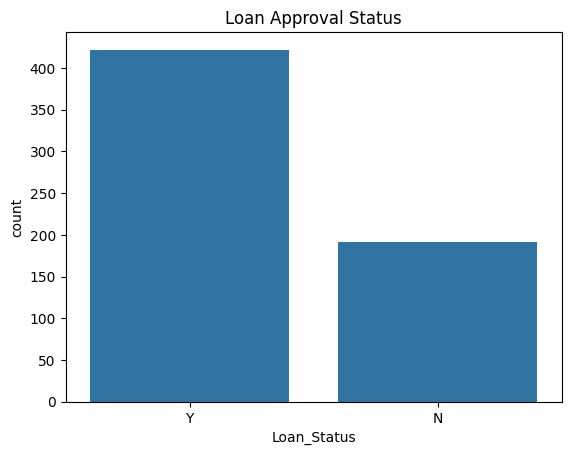

In [24]:
plt.figure()
sns.countplot(x='Loan_Status',data=df)
plt.title("Loan Approval Status")
plt.show()

Gender vs Loan Status

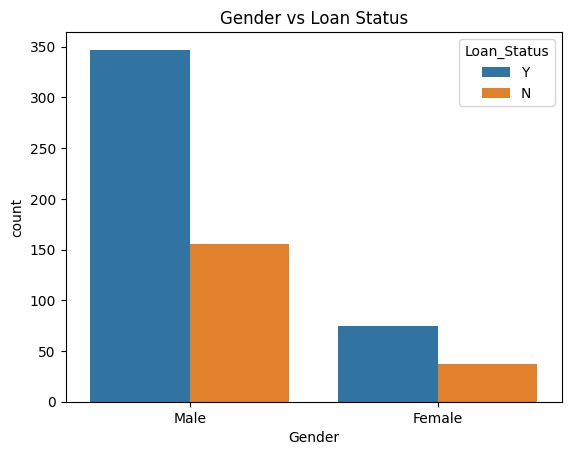

In [25]:
plt.figure()
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title("Gender vs Loan Status")
plt.show()

Education vs Loan Status

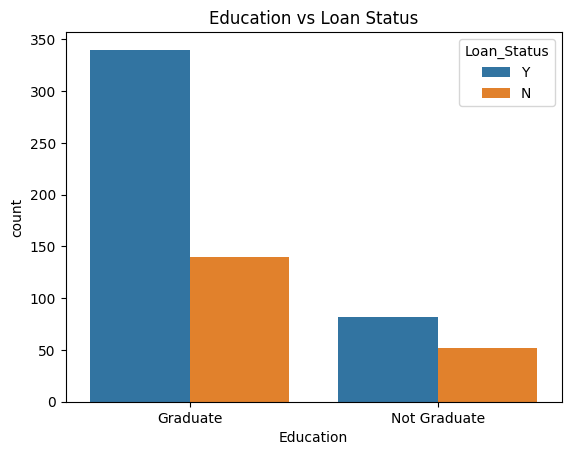

In [26]:
plt.figure()
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.title("Education vs Loan Status")
plt.show()

Application Income Distribution

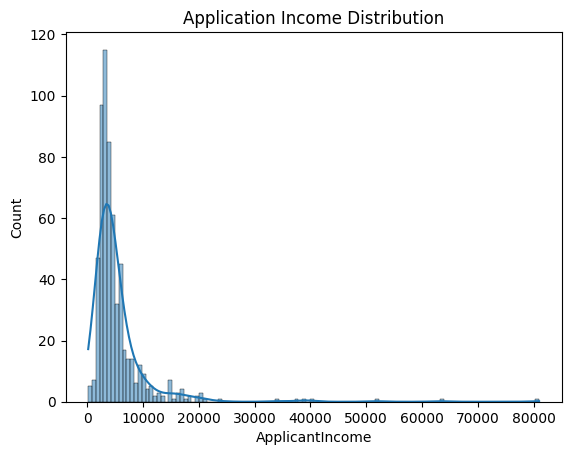

In [27]:
plt.figure()
sns.histplot(df['ApplicantIncome'],kde=True)
plt.title("Application Income Distribution")
plt.show()

Data Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])

Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model Training

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

Accuracy Check

In [31]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)
print(classification_report(y_test,y_pred))

Accuracy: 78.04878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



Feature Importance Graph different colours uses

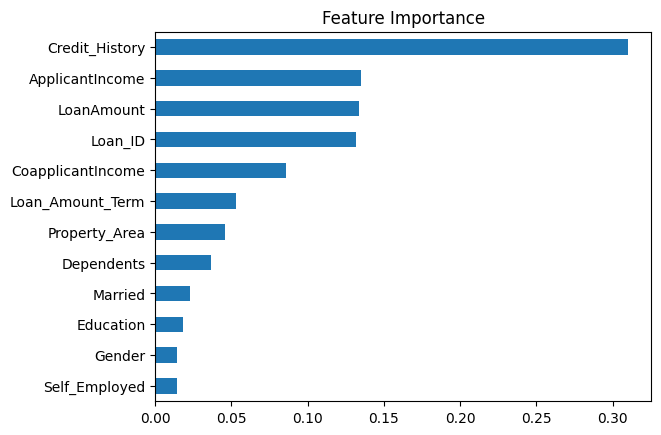

In [32]:
plt.figure()
pd.Series(model.feature_importances_,index=x.columns)\
.sort_values()\
.plot(kind='barh')
plt.title("Feature Importance")
plt.show()

